In [ ]:
# The whole year 2023 data of LS and LB is in '/content/washington_dc_lime.csv'. need to clean data and seperate escooter and bike from LIME data first.

              id     olat     olng     dlat     dlng         ots  duration  \
0  222CTQEY3EIQZ  38.8802 -77.0248  38.8835 -77.0253  1711997107       718   
1  222CTQEY3EIQZ  38.8838 -77.0254  38.8988 -77.0334  1712003585      1440   
2  222CTQEY3EIQZ  38.8844 -77.0291  38.8940 -77.0217  1714353306      1079   
3  222CTQEY3EIQZ  38.8904 -77.0257  38.8920 -77.0237  1713899406       719   
4  222CTQEY3EIQZ  38.8920 -77.0236  38.9054 -77.0059  1713983285      1080   

      distance  vehicle  
0   369.486754  scooter  
1  1805.923000  scooter  
2  1244.867610  scooter  
3   248.222596  scooter  
4  2136.896057  scooter  


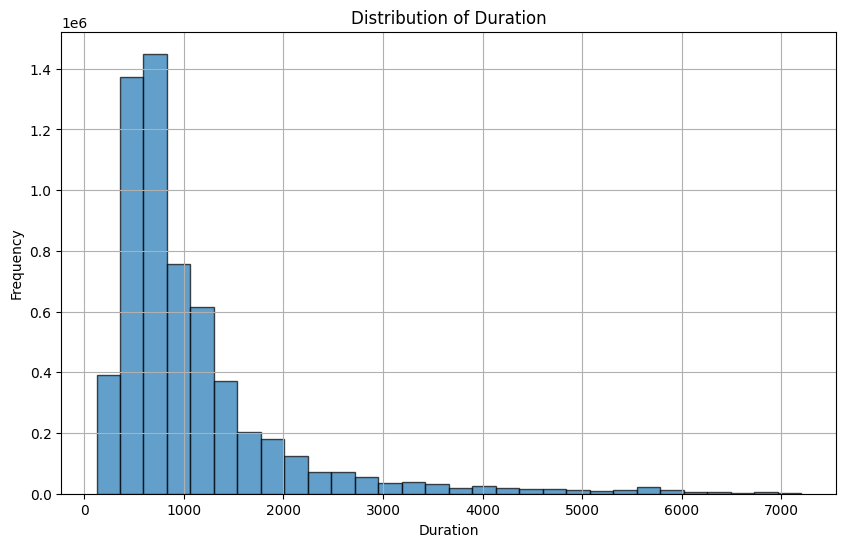

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/washington_dc_lime.csv')

print(df.head())

plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
unique_vehicles = df['vehicle'].unique()

print("Unique values in 'vehicle' column:")
print(unique_vehicles)

Unique values in 'vehicle' column:
['scooter' 'bike']


In [ ]:
vehicle_counts = df['vehicle'].value_counts()

print("Counts of each vehicle type:")
print(vehicle_counts)

Counts of each vehicle type:
vehicle
scooter    3990171
bike       1960911
Name: count, dtype: int64


In [ ]:
df['ots'] = pd.to_datetime(df['ots'], unit='s')

print("Data after converting 'ots' column:")
print(df.head())

Data after converting 'ots' column:
              id     olat     olng     dlat     dlng                 ots  \
0  222CTQEY3EIQZ  38.8802 -77.0248  38.8835 -77.0253 2024-04-01 18:45:07   
1  222CTQEY3EIQZ  38.8838 -77.0254  38.8988 -77.0334 2024-04-01 20:33:05   
2  222CTQEY3EIQZ  38.8844 -77.0291  38.8940 -77.0217 2024-04-29 01:15:06   
3  222CTQEY3EIQZ  38.8904 -77.0257  38.8920 -77.0237 2024-04-23 19:10:06   
4  222CTQEY3EIQZ  38.8920 -77.0236  38.9054 -77.0059 2024-04-24 18:28:05   

   duration     distance  vehicle  
0       718   369.486754  scooter  
1      1440  1805.923000  scooter  
2      1079  1244.867610  scooter  
3       719   248.222596  scooter  
4      1080  2136.896057  scooter  


In [ ]:
ots_min = df['ots'].min()
ots_max = df['ots'].max()

print("Time range of 'ots' column:")
print(f"Earliest timestamp: {ots_min}")
print(f"Latest timestamp: {ots_max}")

Time range of 'ots' column:
Earliest timestamp: 2022-09-22 01:03:06
Latest timestamp: 2024-05-06 23:52:05


In [ ]:
df['dts'] = df['ots'] + pd.to_timedelta(df['duration'], unit='s')

In [ ]:
# delete duplicate
df_cleaned = df.drop_duplicates(subset=['id', 'olat', 'olng', 'dlat', 'dlng', 'ots', 'duration', 'vehicle'])

print(f"Number of rows before removing duplicates: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


Number of rows before removing duplicates: 5951082
Number of rows after removing duplicates: 5951082


In [ ]:
# Delete rows with duration greater than 2h and less than 120 in the 'duration' column
df_filtered = df[(df['duration'] <= 7200) & (df['duration'] >= 120)]

# Delete any row with a null value among 'olat', 'olng', 'dlat', 'dlng'
df_filtered = df_filtered.dropna(subset=['olat', 'olng', 'dlat', 'dlng'])

# Filter out data from 2023
start_date = '2023-01-01'
end_date = '2023-12-31'
df_filtered = df_filtered[(df_filtered['ots'] >= start_date) & (df_filtered['ots'] <= end_date)]

print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering: {len(df_filtered)}")

Number of rows before filtering: 5951082
Number of rows after filtering: 4034163


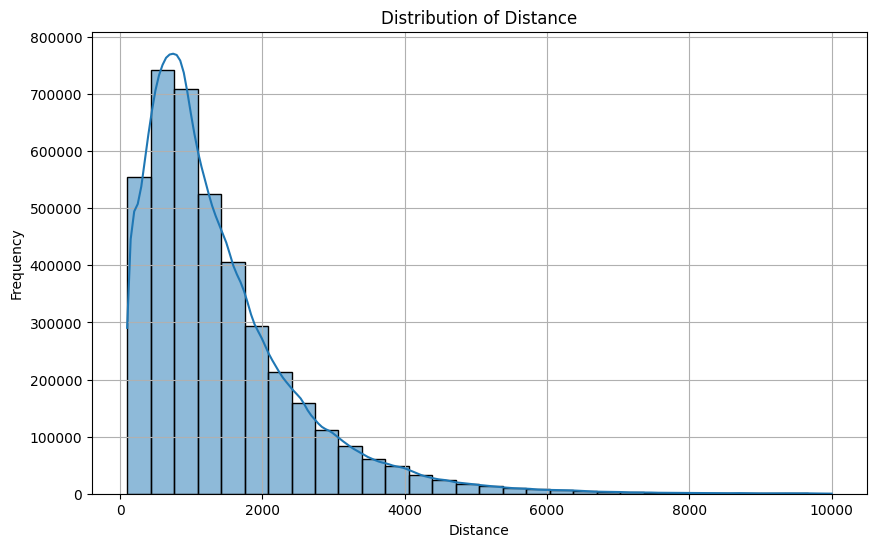

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['distance'], bins=30, kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

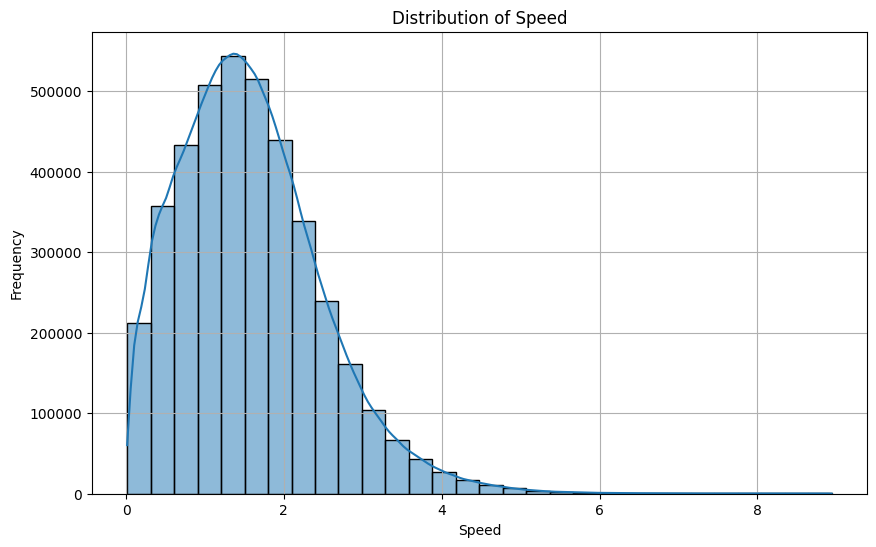

In [ ]:
df_filtered['speed'] = df_filtered['distance'] / df_filtered['duration']

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['speed'], bins=30, kde=True)
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Delete rows where 'speed' is greater than 7
df_filtered = df_filtered[df_filtered['speed'] <= 7]
print(f"Number of rows after filtering: {len(df_filtered)}")

Number of rows after filtering: 4032042


In [ ]:
# Distinguish between 'scooter' and 'bike' based on the value of the vehicle column
df_scooter = df_filtered[df_filtered['vehicle'] == 'scooter']
df_bike = df_filtered[df_filtered['vehicle'] == 'bike']

# Export two new CSV files
df_scooter.to_csv('/content/washington_dc_scooter.csv', index=False)
df_bike.to_csv('/content/washington_dc_bike.csv', index=False)


ots
0     215326
1     186734
2     161979
3     128689
4      93187
5      65880
6      47303
7      30048
8      22109
9      27753
10     48199
11     86806
12    161635
13    180138
14    172097
15    192285
16    226081
17    246111
18    261393
19    286127
20    299875
21    324700
22    308538
23    261170
Name: count, dtype: int64


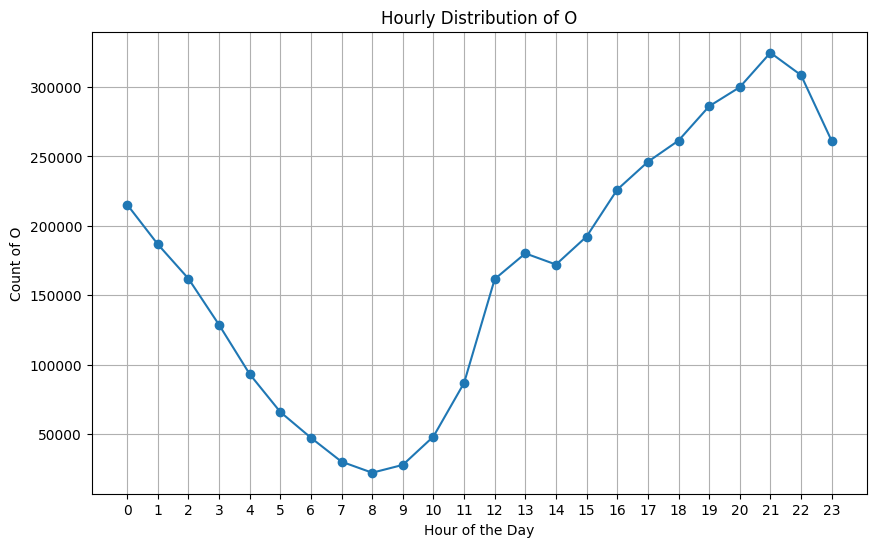

In [ ]:
# Count the number of data items per hour by grouping them by hour
hourly_counts = df_filtered['ots'].dt.hour.value_counts().sort_index()


print(hourly_counts)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of O')
plt.title('Hourly Distribution of O')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [ ]:
#The original time is in UTC. we need to make it to America/New_York time when analysis it.

In [ ]:
import pandas as pd

scooter_df = pd.read_csv('washington_dc_scooter.csv')
bike_df = pd.read_csv('washington_dc_bike.csv')

print("Scooter DataFrame Head:")
print(scooter_df.head())

print("\nBike DataFrame Head:")
print(bike_df.head())


Scooter DataFrame Head:
              id     olat     olng     dlat     dlng                  ots  \
0  222OPEOGXJPJW  38.8712 -77.0060  38.8794 -77.0038  2023-05-06 19:17:05   
1  222OPEOGXJPJW  38.8715 -77.0075  38.8878 -77.0286  2023-02-20 00:51:06   
2  222OPEOGXJPJW  38.8716 -77.0071  38.8748 -77.0052  2023-07-04 19:34:05   
3  222OPEOGXJPJW  38.8718 -77.0061  38.8734 -76.9917  2023-08-16 02:12:06   
4  222OPEOGXJPJW  38.8720 -77.0097  38.8936 -77.0114  2023-08-22 08:08:05   

   duration     distance  vehicle                  dts     speed  
0       540   931.475362  scooter  2023-05-06 19:26:05  1.724954  
1      1619  2573.127232  scooter  2023-02-20 01:18:05  1.589331  
2       300   392.001017  scooter  2023-07-04 19:39:05  1.306670  
3      1019  1259.240539  scooter  2023-08-16 02:29:05  1.235761  
4      1201  2406.313738  scooter  2023-08-22 08:28:06  2.003592  

Bike DataFrame Head:
              id     olat     olng     dlat     dlng                  ots  \
0  224532QI7

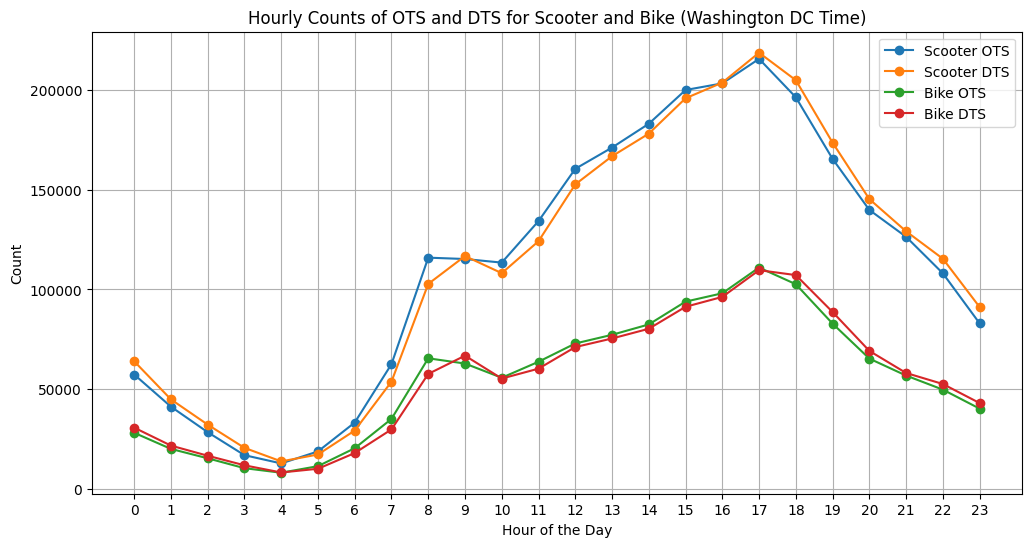

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz

# Convert ots and dts columns to datetime format
scooter_df['ots'] = pd.to_datetime(scooter_df['ots'])
scooter_df['dts'] = pd.to_datetime(scooter_df['dts'])
bike_df['ots'] = pd.to_datetime(bike_df['ots'])
bike_df['dts'] = pd.to_datetime(bike_df['dts'])

# Define UTC and Washington DC time zones
utc = pytz.utc
dc_tz = pytz.timezone('America/New_York')

# Convert time to Washington DC time
scooter_df['ots'] = scooter_df['ots'].dt.tz_localize(utc).dt.tz_convert(dc_tz)
scooter_df['dts'] = scooter_df['dts'].dt.tz_localize(utc).dt.tz_convert(dc_tz)
bike_df['ots'] = bike_df['ots'].dt.tz_localize(utc).dt.tz_convert(dc_tz)
bike_df['dts'] = bike_df['dts'].dt.tz_localize(utc).dt.tz_convert(dc_tz)

# Extract hour information
scooter_df['ots_hour'] = scooter_df['ots'].dt.hour
scooter_df['dts_hour'] = scooter_df['dts'].dt.hour
bike_df['ots_hour'] = bike_df['ots'].dt.hour
bike_df['dts_hour'] = bike_df['dts'].dt.hour

# Aggregate counts for each hour
scooter_ots_count = scooter_df['ots_hour'].value_counts().sort_index()
scooter_dts_count = scooter_df['dts_hour'].value_counts().sort_index()
bike_ots_count = bike_df['ots_hour'].value_counts().sort_index()
bike_dts_count = bike_df['dts_hour'].value_counts().sort_index()

# Create a DataFrame to display the results
hourly_counts = pd.DataFrame({
    'scooter_ots_count': scooter_ots_count,
    'scooter_dts_count': scooter_dts_count,
    'bike_ots_count': bike_ots_count,
    'bike_dts_count': bike_dts_count
}).fillna(0).astype(int)

# Draw a line chart
plt.figure(figsize=(12, 6))

# Scooter OTS
plt.plot(hourly_counts.index, hourly_counts['scooter_ots_count'], label='Scooter OTS', marker='o')
# Scooter DTS
plt.plot(hourly_counts.index, hourly_counts['scooter_dts_count'], label='Scooter DTS', marker='o')
# Bike OTS
plt.plot(hourly_counts.index, hourly_counts['bike_ots_count'], label='Bike OTS', marker='o')
# Bike DTS
plt.plot(hourly_counts.index, hourly_counts['bike_dts_count'], label='Bike DTS', marker='o')

plt.title('Hourly Counts of OTS and DTS for Scooter and Bike (Washington DC Time)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))

plt.show()
